# `Principal Component Analysis -------------------------------------`
### Important method other than PCA => [t-distributed stochastic neighbor embedding ( Advanced PCA )](https://www.youtube.com/watch?v=NEaUSP4YerM)
- `PCA captures direction at which max vaiance is happening`
##### `STEPS:`
1. only consider continious variables
2. standard scaler should be applied
3. find covariance matrix, it can cover 2 things:
    - variance within them 
    - covariance
4. find eigen values and eigen vectors for the above covariance matrix
5. choose direction whuch has high variance
6. Identify principal components

![](https://i.stack.imgur.com/qCgoI.png)

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

`you can also use pca for visualization, if you have large variable and you are not able to visualize the pattern then you convert it into a pca and then you can plot and check`

In [118]:
wine = load_wine()
x = wine.data

data = pd.DataFrame(data=x,columns=wine.feature_names)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


<AxesSubplot:>

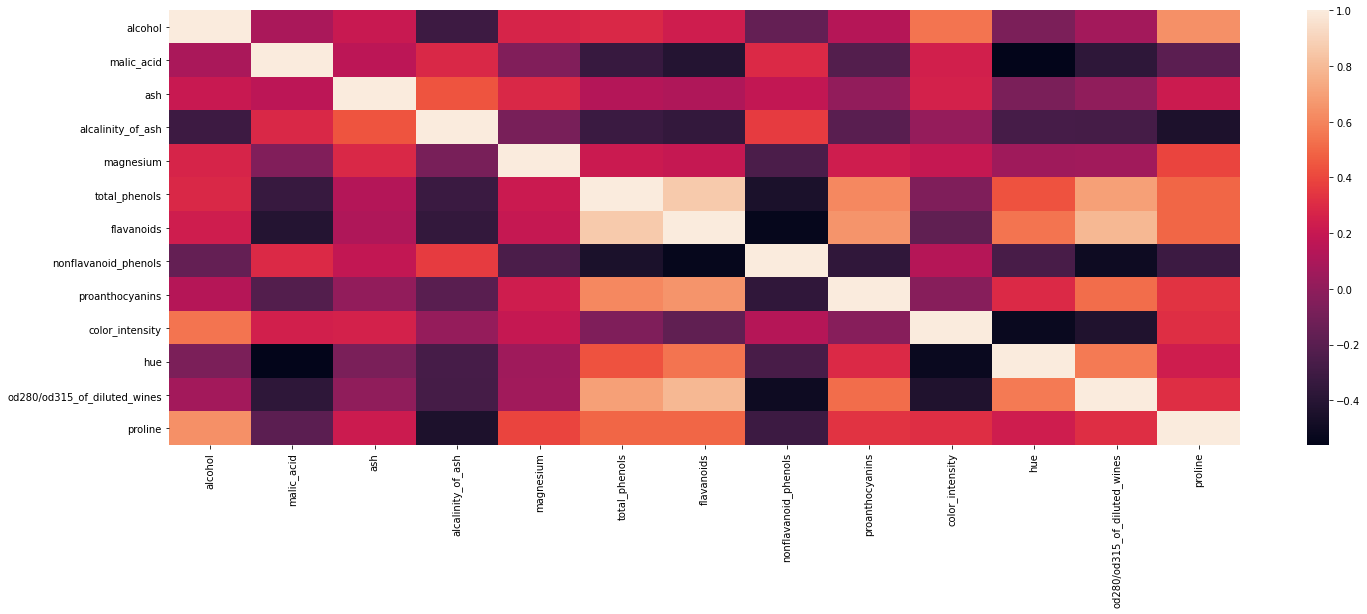

In [119]:
plt.figure(figsize=(24,8))
sns.heatmap(data.corr())

In [120]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [121]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [122]:
y = wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### `Scaling`

In [123]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data_transformed = st.fit_transform(data)
data_transformed

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### `PCA ---------------------------------------------------------`

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_transformed)

PCA(n_components=2)

#### `explained variance`

In [125]:
sum(pca.explained_variance_ratio_)

0.5540633835693531

#### `they only explained 50% of the data`

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data_transformed)
sum(pca.explained_variance_ratio_)

0.6652996889318527

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data_transformed)
sum(pca.explained_variance_ratio_)

0.8016229275554789

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(data_transformed)
sum(pca.explained_variance_ratio_)

0.9616971684450644

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
pca.fit(data_transformed)
sum(pca.explained_variance_ratio_)

0.9920478511010056

#### `principal components`

In [130]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233])

### `plotting elbow curve`

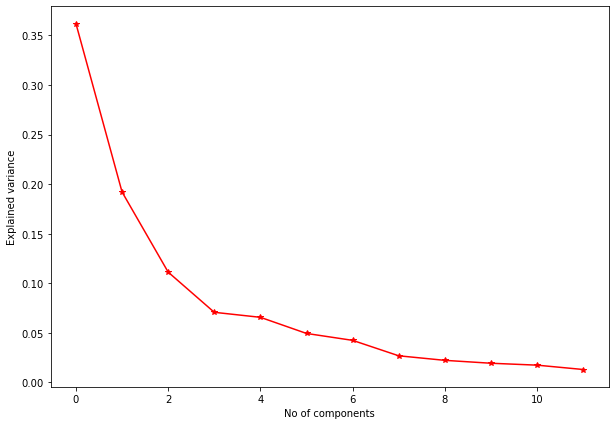

In [131]:
plt.figure(figsize=(10,7))
plt.plot(pca.explained_variance_ratio_,marker='*',color='red')
plt.xlabel('No of components')
plt.ylabel('Explained variance')
plt.show()

### `choosed 3 principal components`

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(data_transformed)
pca_data = pca.transform(data_transformed)
pca_data

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [133]:
pca_data = pd.DataFrame(pca_data,columns=['PCA1','PCA2','PCA3'])
pca_data['target'] = y

In [134]:
pca_data

,PCA1,PCA2,PCA3,target
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,2
174,-2.601956,-1.757229,0.207581,2
175,-2.677839,-2.760899,-0.940942,2
176,-2.387017,-2.297347,-0.550696,2


### `this will be used for ML models`

In [135]:
import plotly.express as px
px.scatter_3d(pca_data,x='PCA1',y='PCA2',z='PCA3',color=y)

### `Now data is ready to go for model selection`

In [136]:
X = pca_data.drop('target',axis=1)
y = pca_data['target']

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [138]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

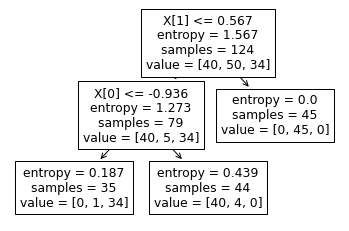

In [139]:
plot_tree(tree);

In [140]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.9629629629629629


### `Before dimension reduction`

In [141]:
X = data
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [142]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

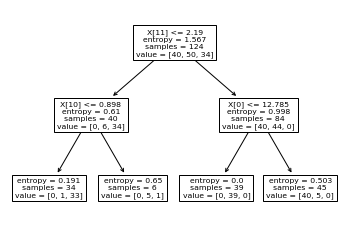

In [143]:
plot_tree(tree);

In [144]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.astype(int),y_pred))

0.8888888888888888


### `All variables together are reducing accuracy ------------------------`
## `After reduction you can go for clustering, classification or regression`

- `Any type of clustering algorithm will not support outliers`
- [ Low Variance Filter](https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-low-variance-filter-and-its-implementation/)
- [VarianceThreshold => zero variance analysis](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)

# `END -----------------------------------`